# Nelson Seigel Yield Curve Construction

## Model Calibration & Plotting using Mean Squared Error optimization

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

In [2]:
def nelson_siegel(params, maturity, yields):
    a1, a2, a3, beta = params
    bonds_df = pd.DataFrame(zip(maturity, yields))
    bonds_df.columns = ['maturity', 'yields']
    bonds_df['model_yields'] = 0
    for i in range(bonds_df.shape[0]):
        bonds_df.loc[i,'model_yields'] = a1 + (a2 + a3) * ((1 - np.exp(-bonds_df.loc[i,'maturity'] / beta)) / (bonds_df.loc[i,'maturity'] / beta)) - a3*np.exp(- bonds_df.loc[i,'maturity']/beta)
    
    obj_func = (bonds_df['model_yields'] - bonds_df['yields'])**2
    
    return obj_func.sum()

In [3]:
maturity = np.array([1, 2, 3, 4, 5, 7, 10, 20, 30])
yields = np.array([0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.15])

In [4]:
bonds_df = pd.DataFrame(maturity, yields).reset_index()
bonds_df.columns = ['yields','maturity']
bonds_df

,yields,maturity
0,0.02,1
1,0.03,2
2,0.04,3
3,0.05,4
4,0.06,5
5,0.08,7
6,0.10,10
7,0.12,20
8,0.15,30


In [5]:
def fit_yield_curve(bonds_df):
    x0 = [0.05, -0.01, -0.02, 5.0] # Initial parameters for optimization
    
    result = minimize(nelson_siegel, x0, args=(maturity, yields))
    return result.x

In [6]:
parameters = fit_yield_curve(bonds_df)

In [7]:
parameters

array([ 0.17818322, -0.17400282, -0.02663104,  5.00142348])

In [8]:
a1, a2, a3, beta = parameters

In [9]:
bonds_df

,yields,maturity
0,0.02,1
1,0.03,2
2,0.04,3
3,0.05,4
4,0.06,5
5,0.08,7
6,0.10,10
7,0.12,20
8,0.15,30


In [10]:
bonds_df['model_maturity'] = a1 + (a2 + a3) * ((1 - np.exp(-bonds_df['maturity'] / beta)) / (bonds_df['maturity'] / beta)) - a3*np.exp(- bonds_df['maturity']/beta)

In [11]:
import matplotlib.pyplot as plt

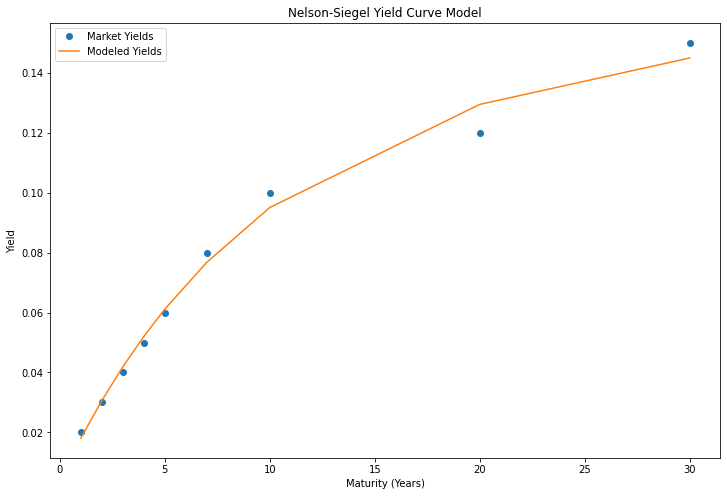

In [12]:
# Plot yield curve
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(bonds_df['maturity'], bonds_df['yields'], 'o', label='Market Yields')
ax.plot(bonds_df['maturity'], bonds_df['model_maturity'], label='Modeled Yields')
ax.set_xlabel('Maturity (Years)')
ax.set_ylabel('Yield')
ax.set_title('Nelson-Siegel Yield Curve Model')
ax.legend()
plt.show()